# Análise de Discrepância no preço de Venda de Produtos

## Dúvida da área de negócios
* **Será que nossos diferentes lojistas associados conseguem manter o preço do mesmo produto sem grandes discrepâncias?**

* **Resposta:** Com base nas análises realizadas, chegou-se a conclusão de que o preço de um mesmo produto é mantido **sim** sem grandes discrepâncias. Para responder esta questão foi utilizado como base medidas de dispersão. Utilizando a medida de dispersão **desvio padrão** viu que 82.12% dos produtos não sofrem variações de preço de vendas, e que 17.88% sofrem variações. E utilizando a medida de dispersão **variância** vimos que 82.41% dos produtos não sofrem variações de preço de vendas, e que 17.59% sofrem variações. 

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Carregando bases de dados

In [3]:
df_customers = pd.read_csv('datasets/olist_customers_dataset.csv', encoding='ISO-8859-1')
df_geolocation = pd.read_csv('datasets/olist_geolocation_dataset.csv', encoding='ISO-8859-1')
df_order_items = pd.read_csv('datasets/olist_order_items_dataset.csv', encoding='ISO-8859-1')
df_order_payments = pd.read_csv('datasets/olist_order_payments_dataset.csv', encoding='ISO-8859-1')
df_order_reviews = pd.read_csv('datasets/olist_order_reviews_dataset.csv', encoding='ISO-8859-1')
df_orders = pd.read_csv('datasets/olist_orders_dataset.csv', encoding='ISO-8859-1')
df_products = pd.read_csv('datasets/olist_products_dataset.csv', encoding='ISO-8859-1')
df_sellers = pd.read_csv('datasets/olist_sellers_dataset.csv', encoding='ISO-8859-1')
df_product_category_name_translation = pd.read_csv('datasets/product_category_name_translation.csv', encoding='ISO-8859-1')

## Base de Clientes

In [4]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Base de Geolocalizações

In [5]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## Base de Pedidos

In [6]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## Itens do pedido

In [7]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## Forma de pagamento de cada pedido

In [8]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## Retorno de clientes sobre a compra realizada

In [9]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,ParabÃ©ns lojas lannister adorei comprar pela ...,2018-03-01 00:00:00,2018-03-02 10:26:53


## Dados cadastrais de cada produto

In [10]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## Tradução das categorias de produtos

In [11]:
df_product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Criando um dataset para receber dados dos produtos, tais como: 
* <strong>PRODUCT_ID</strong> - id do produto
* <strong>SELLER_ID</strong> - id do vendedor
* <strong>STD_PRICE</strong> - desvio padrão do preço
* <strong>MEAN_PRICE</strong> - média de preço
* <strong>VAR_PRICE</strong> - variância do preço
* <strong>MIN_PRICE</strong> - preço de venda mínimo
* <strong>MAX_PRICE</strong> - preço de venda máximo
* <strong>COUNT_ORDER</strong> - quantidade de pedidos de cada produto
* <strong>COUNT_VAR_PRICE</strong> - quantidade de variações de preço

In [36]:
# Definindo colunas do dataset
df_price_products = pd.DataFrame(columns=['PRODUCT_ID', 'SELLER_ID', 'STD_PRICE', 
                                          'MEAN_PRICE', 'VAR_PRICE', 'MIN_PRICE', 'MAX_PRICE', 'COUNT_ORDER', 'COUNT_VAR_PRICE'])

## Preenchendo o dataset **df_price_products**

In [37]:
for product_id in df_products['product_id']:
    seller_id = df_order_items[df_order_items['product_id'] == product_id]['seller_id'].unique()
    std_price = round(df_order_items[df_order_items['product_id'] == product_id]['price'].std(),2)
    mean_price = round(df_order_items[df_order_items['product_id'] == product_id]['price'].mean(),2)
    var_price = round(df_order_items[df_order_items['product_id'] == product_id]['price'].var(),2)
    min_price = df_order_items[df_order_items['product_id'] == product_id]['price'].min()
    max_price = df_order_items[df_order_items['product_id'] == product_id]['price'].max()
    count_order = len(df_order_items[df_order_items['product_id'] == product_id])
    count_var_price = len(df_order_items[df_order_items['product_id'] == product_id]['price'].unique())
    
    df_price_products = df_price_products.append({'PRODUCT_ID':product_id, 'SELLER_ID':seller_id[0],'STD_PRICE':std_price,
                                                  'MEAN_PRICE':mean_price, 'VAR_PRICE':var_price, 'MIN_PRICE': min_price,
                                                'MAX_PRICE':max_price, 'COUNT_ORDER':count_order, 'COUNT_VAR_PRICE':count_var_price}, ignore_index=True)

## Exibindo algumas linhas do dataset **df_price_products** para validar se os campos foram preenchidos de forma correta

In [38]:
df_price_products.head()

,PRODUCT_ID,SELLER_ID,STD_PRICE,MEAN_PRICE,VAR_PRICE,MIN_PRICE,MAX_PRICE,COUNT_ORDER,COUNT_VAR_PRICE
0,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,NaN,10.91,NaN,10.91,10.91,1,1
1,3aa071139cb16b67ca9e5dea641aaa2f,b561927807645834b59ef0d16ba55a24,NaN,248.00,NaN,248.00,248.00,1,1
2,96bd76ec8810374ed1b65e291975717f,7b07b3c7487f0ea825fc6df75abd658b,NaN,79.80,NaN,79.80,79.80,1,1
3,cef67bcfe19066a932b7673e239eb23d,c510bc1718f0f2961eaa42a23330681a,NaN,112.30,NaN,112.30,112.30,1,1
4,9dc1a7de274444849c219cff195d0b71,0be8ff43f22e456b4e0371b2245e4d01,NaN,37.90,NaN,37.90,37.90,1,1


## Tratando valores nulos no dataset **df_price_products**

* Ao analisar o dataset **df_price_products**, identificou-se que as colunas **STD_PRICE e VAR_PRICE** possuem valores nulos, e isso é consequência da quantidade de pedidos e por não ter variações de preço de venda do produto. Com base nessa análise, os campos nulos foram preenchidos com valor **zero**

In [39]:
df_price_products.fillna(0, inplace=True)

## Exibindo algumas linhas do dataset **df_price_products**

In [47]:
df_price_products.head()

,PRODUCT_ID,SELLER_ID,STD_PRICE,MEAN_PRICE,VAR_PRICE,MIN_PRICE,MAX_PRICE,COUNT_ORDER,COUNT_VAR_PRICE
0,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,0.0,10.91,0.0,10.91,10.91,1,1
1,3aa071139cb16b67ca9e5dea641aaa2f,b561927807645834b59ef0d16ba55a24,0.0,248.00,0.0,248.00,248.00,1,1
2,96bd76ec8810374ed1b65e291975717f,7b07b3c7487f0ea825fc6df75abd658b,0.0,79.80,0.0,79.80,79.80,1,1
3,cef67bcfe19066a932b7673e239eb23d,c510bc1718f0f2961eaa42a23330681a,0.0,112.30,0.0,112.30,112.30,1,1
4,9dc1a7de274444849c219cff195d0b71,0be8ff43f22e456b4e0371b2245e4d01,0.0,37.90,0.0,37.90,37.90,1,1


## Salvando dataset **df_price_products** em csv

In [28]:
df_price_products.to_csv('datasets/df_price_products')

In [44]:
df_order_items[df_order_items['product_id'] == '0992c6cba95a13bfa68ea7d5e22d478b']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
16857,269bbdf003d4126d5687fbaf9542813d,1,0992c6cba95a13bfa68ea7d5e22d478b,d50d79cb34e38265a8649c383dcffd48,2017-12-28 22:38:32,355.99,17.25
26653,3c9e706b2938bbef0922d8c7da956ec8,1,0992c6cba95a13bfa68ea7d5e22d478b,d50d79cb34e38265a8649c383dcffd48,2017-08-29 02:46:54,355.99,28.81
33431,4bb2ee0b9741faceac3deb03a2e53fa6,1,0992c6cba95a13bfa68ea7d5e22d478b,d50d79cb34e38265a8649c383dcffd48,2018-08-15 11:05:13,405.99,36.60


## Percentual de produtos que possuem variações de preço de vendas com base no **desvio padrão**

Percentual com variações: 17.88%
Percentual sem variações: 82.12%


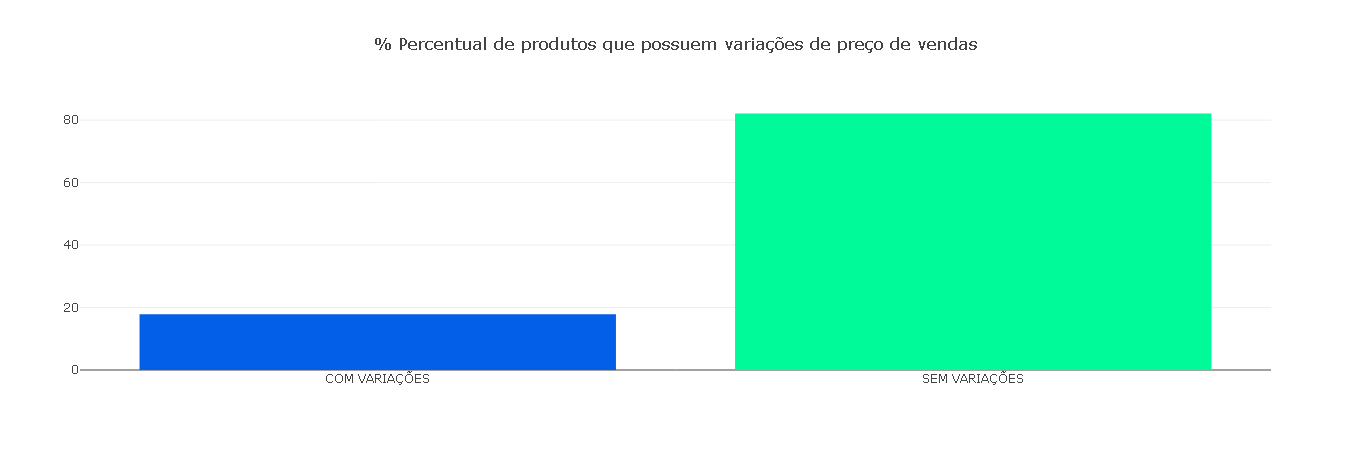

In [123]:
percent_no_variation = round(df_price_products[df_price_products['STD_PRICE'] == 0].shape[0] / df_price_products.shape[0] * 100,2)
percent_yes_variation = round(df_price_products[df_price_products['STD_PRICE'] > 0].shape[0] / df_price_products.shape[0] * 100,2)

print(f"Percentual com variações: {percent_yes_variation}%")
print(f"Percentual sem variações: {percent_no_variation}%")

perc_ruptura = [go.Bar(x = ['COM VARIAÇÕES', 'SEM VARIAÇÕES'], y=[percent_yes_variation, percent_no_variation], marker=dict(color=['#035ee8', '#00fa9a']))]

layout = go.Layout( title='% Percentual de produtos que possuem variações de preço de vendas')

fig = go.Figure(data=perc_ruptura, layout=layout)

py.iplot(fig, filename='color-bar')

## Percentual de produtos que possuem variações de preço de vendas com base na **variância**

Percentual com variações: 17.59%
Percentual sem variações: 82.41%


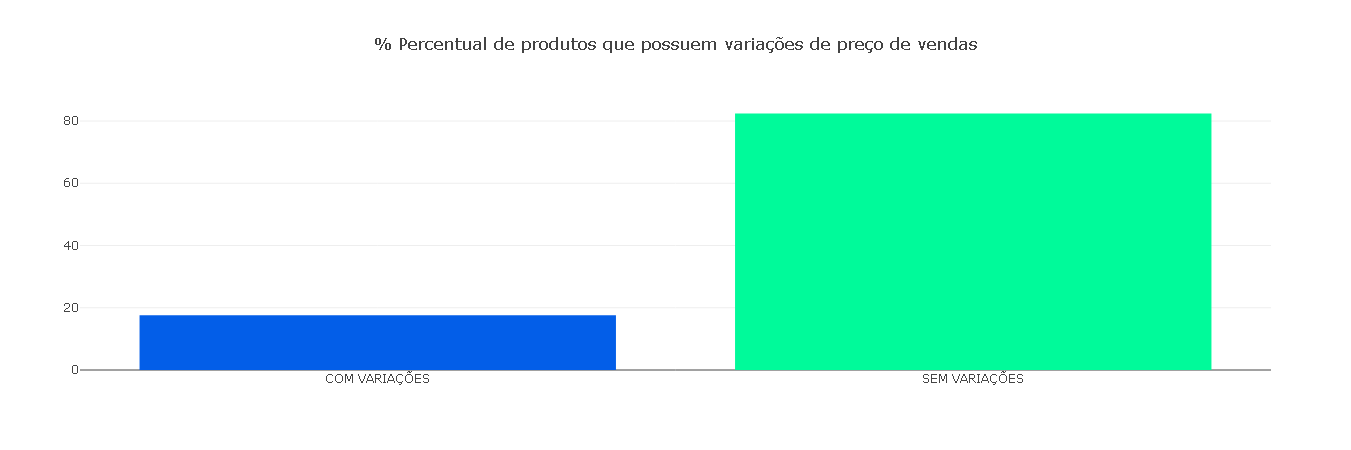

In [124]:
percent_no_variation = round(df_price_products[df_price_products['VAR_PRICE'] == 0].shape[0] / df_price_products.shape[0] * 100,2)
percent_yes_variation = round(df_price_products[df_price_products['VAR_PRICE'] > 0].shape[0] / df_price_products.shape[0] * 100,2)

print(f"Percentual com variações: {percent_yes_variation}%")
print(f"Percentual sem variações: {percent_no_variation}%")

perc_ruptura = [go.Bar(x = ['COM VARIAÇÕES', 'SEM VARIAÇÕES'], y=[percent_yes_variation, percent_no_variation], marker=dict(color=['#035ee8', '#00fa9a']))]

layout = go.Layout( title='% Percentual de produtos que possuem variações de preço de vendas')

fig = go.Figure(data=perc_ruptura, layout=layout)

py.iplot(fig, filename='color-bar')